In [ ]:
!pip install tensorflow_addons

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading a dataset, for this example we will be using the eurosat data from TensorFlow datasets as a starting point
dataset = tfds.load('eurosat', with_info = True)

# We are going to train at 60%, test at 20%, and validate at 20%.
train_ds = tfds.load('eurosat', split='train[:60%]')
test_ds = tfds.load('eurosat', split='train[60%:80%]')
valid_ds = tfds.load('eurosat', split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/eurosat/rgb/2.0.0.incomplete6FVNRL/eurosat-train.tfrecord*...:   0%|          …

Dataset eurosat downloaded and prepared to ~/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# Here we are initializing our class names, number of classes, and the examples that we will have
class_names = dataset[1].features['label'].names
num_classes = len(class_names)
num_examples = dataset[1].splits['train'].num_examples

In [ ]:
# Preparing to train the model
def trainprep(ds, cache=True, batch_size=64, shuffle_buffer_size=1000):

  # Cache is a method that saves the preprocessed dataset into a local cache
  # Only preprocesses it for the very first time in the 1st epoch
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  # Maps the dataset so that each sample is a tuple of an image
  ds = ds.map(lambda d: (d["image"], tf.one_hot(d["label"], num_classes)))

  # Shuffles the dataset so the samples are random
  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Every time we iterate through, it'll repeatedly generate samples
  ds = ds.repeat()

  # Batch our DS into 64 or 32 samples per training step
  ds = ds.batch(batch_size)
  
  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return ds

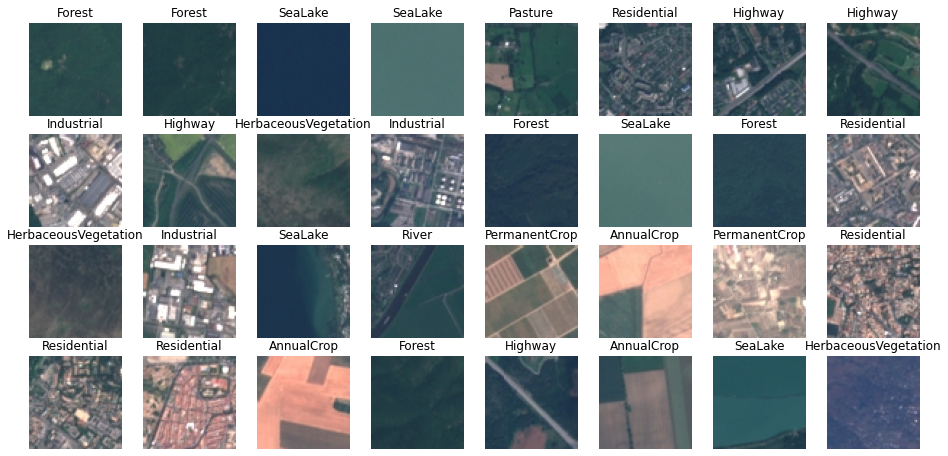

In [ ]:
batch_size = 64

train_ds = trainprep(train_ds, batch_size=batch_size)
valid_ds = trainprep(valid_ds, batch_size=batch_size)

batch = next(iter(train_ds))

def show_batch(batch):
  plt.figure(figsize=(16, 16))

  for n in range(min(32, batch_size)):
      ax = plt.subplot(batch_size//8, 8, n + 1)
      plt.imshow(batch[0][n])
      plt.title(class_names[tf.argmax(batch[1][n].numpy())])
      plt.axis('off')
      plt.savefig("sample-images.png")


show_batch(batch)